In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\srine.LAPTOP-PIPMDH7M\Downloads\supermarket_sales (1).csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
data.shape

(1000, 17)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.value_counts()


Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

In [7]:
data.shape

(1000, 17)

In [8]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
data=data.dropna()
data.isnull().sum()
data.shape

(1000, 17)

In [10]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

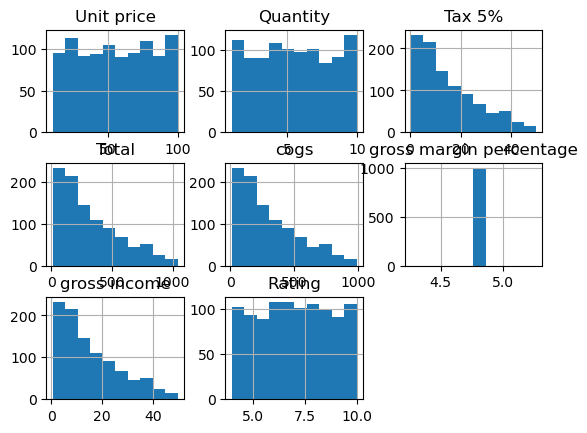

In [12]:
data.hist()

<Axes: xlabel='Invoice ID', ylabel='count'>

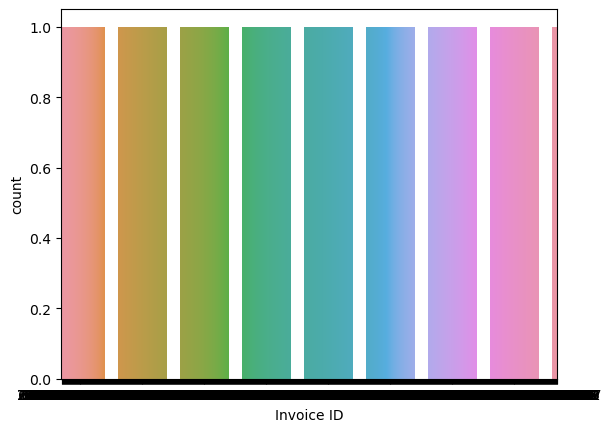

In [13]:
sns.countplot(x='Invoice ID',data=data)

<Axes: xlabel='Branch', ylabel='count'>

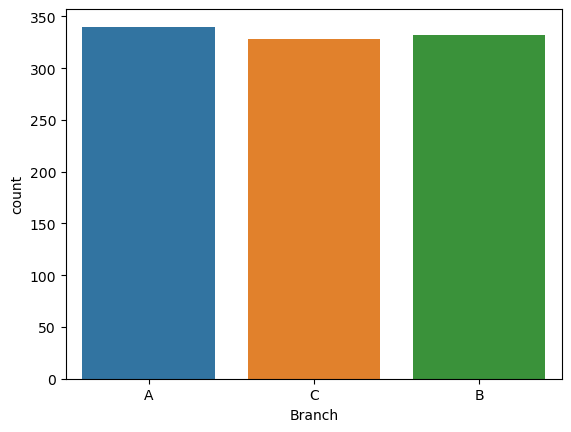

In [14]:
sns.countplot(x='Branch',data=data)

<Axes: xlabel='City', ylabel='count'>

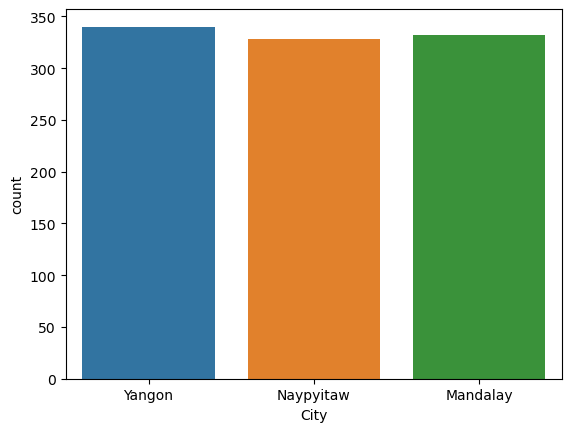

In [15]:
sns.countplot(x='City',data=data)

<Axes: xlabel='Customer type', ylabel='count'>

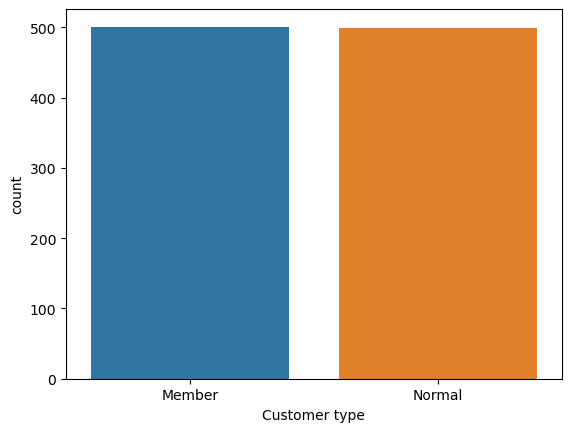

In [16]:
sns.countplot(x='Customer type',data=data)

<Axes: xlabel='Gender', ylabel='count'>

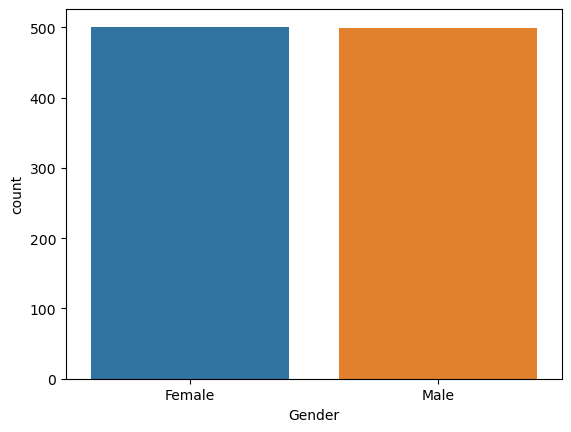

In [17]:
sns.countplot(x='Gender',data=data)

<Axes: xlabel='Product line', ylabel='count'>

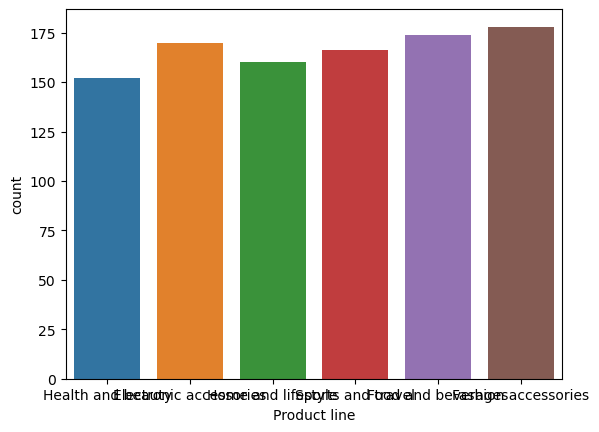

In [18]:
sns.countplot(x='Product line',data=data)

In [19]:
def remoutliers(colname):
    lb=data[colname].quantile(0.05)
    ub=data[colname].quantile(0.95)
    data.loc[(data[colname]<=lb)|(data[colname]>=ub),colname]=np.nan
    data[colname].fillna(data[colname].mean(),inplace=True)

<Axes: ylabel='Unit price'>

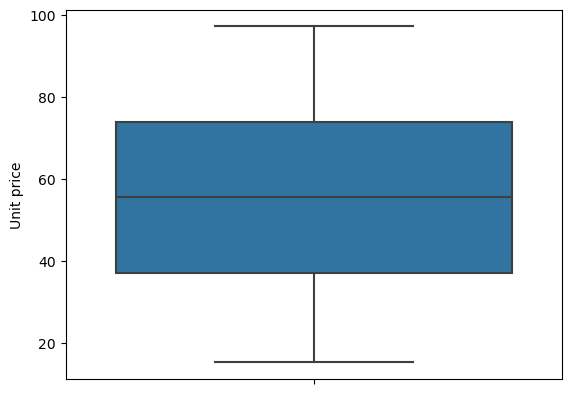

In [20]:
remoutliers('Unit price')
sns.boxplot(data=data,y='Unit price')

<Axes: ylabel='gross income'>

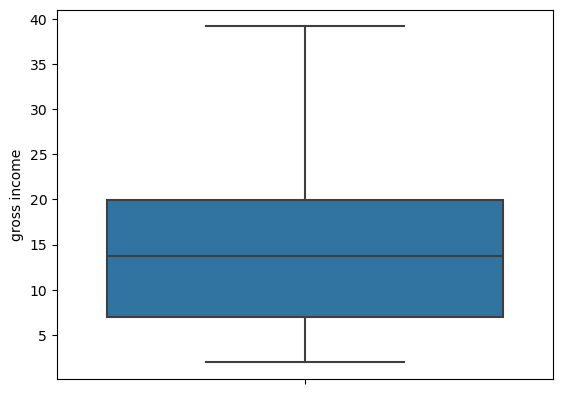

In [21]:
remoutliers('gross income')
sns.boxplot(data=data,y='gross income')

In [22]:
list_1=list(data.columns)
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [24]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.690000,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.141500,9.1
1,142,2,1,1,0,0,15.280000,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.820000,9.6
2,653,0,2,1,1,4,46.330000,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.215500,7.4
3,18,0,2,0,1,3,58.220000,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.288000,8.4
4,339,0,2,1,1,5,86.310000,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.350000,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.017500,6.2
996,250,1,0,1,0,4,55.667767,10,48.6900,1022.4900,70,342,2,973.80,4.761905,14.605339,4.4
997,767,0,2,0,1,2,31.840000,1,1.5920,33.4320,58,154,0,31.84,4.761905,14.605339,7.7
998,308,0,2,1,1,4,65.820000,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.291000,4.1


In [25]:
# Data Preprocessing (Feature Selection and Encoding)
data = pd.get_dummies(data, drop_first=True)
X = data.drop(["Total", "Gender"], axis=1)  # Features
y = data["Total"]  # Target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [26]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)

# Model Predictions
y_pred = rf_model.predict(x_test)


In [27]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared Score: {r2 * 100:.2f}%")  
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared Score: 100.00%
Mean Absolute Error: 0.78
Mean Squared Error: 1.86


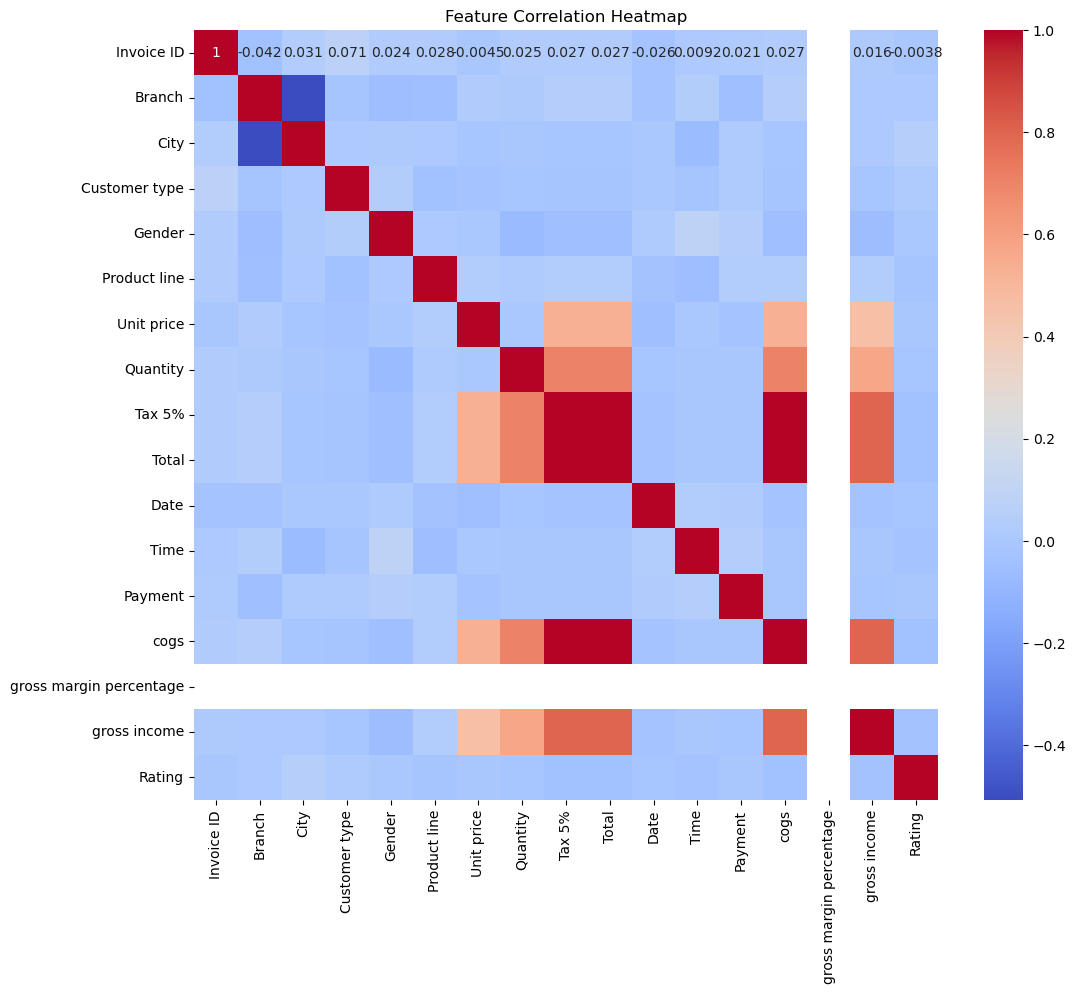

In [28]:
# Visualization - Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

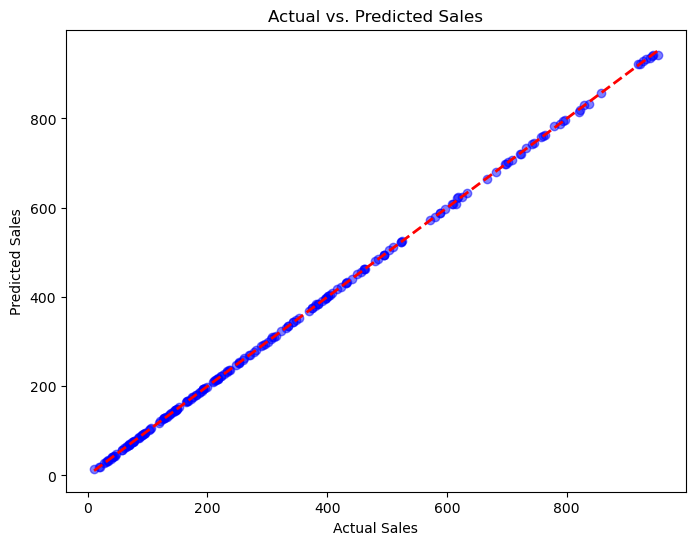

In [29]:
# Scatter Plot: Actual vs. Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # 45-degree line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

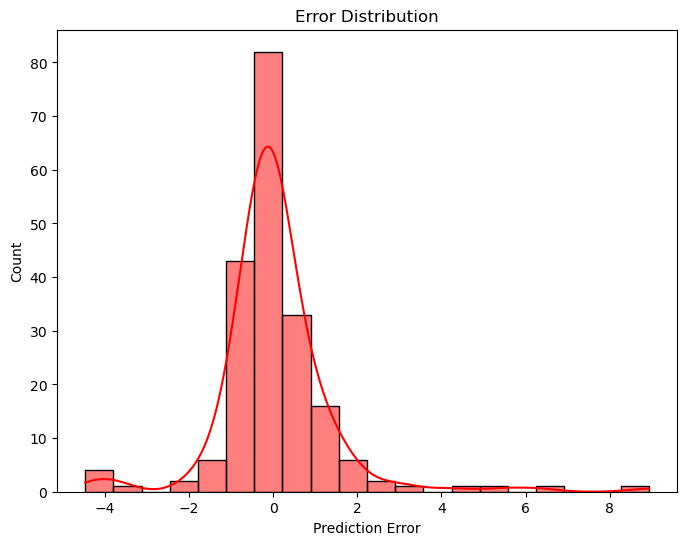

In [30]:
# Error Distribution (Histogram)
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=20, kde=True, color='red')
plt.xlabel("Prediction Error")
plt.title("Error Distribution")
plt.show()

In [31]:
# Feature Importance (Top 10 Features)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(15)

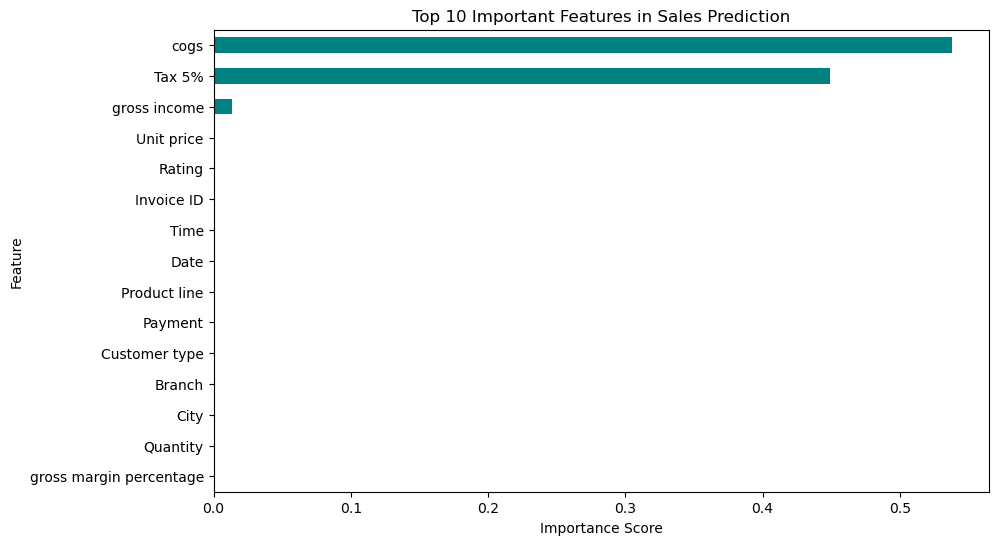

In [32]:
# Top 10 important features
plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Sales Prediction")
plt.gca().invert_yaxis()
plt.show() 